# Penjelasan Dataset yang digunakan

## 1. Kasus yang diambil

Dataset ini berisi kumpulan artikel berita dari CNN yang mencakup berbagai isu global seperti ekonomi, politik, kesehatan, kebijakan pemerintah, hingga dinamika krisis internasional yang terjadi selama periode pandemi Covid-19. Setiap artikel memuat judul, isi berita, tanggal publikasi, dan tautan sumber yang menunjukkan konteks asli berita tersebut. Berita-berita dalam dataset ini ditulis pada masa ketika pandemi memberikan dampak besar terhadap berbagai sektor, sehingga kontennya banyak membahas mengenai perubahan ekonomi global, respons negara terhadap krisis kesehatan, pelemahan pasar finansial, kebijakan perjalanan internasional, hingga strategi pemulihan ekonomi. Dengan cakupan topik yang luas dan bersifat real time terhadap kejadian global, dataset ini sangat relevan untuk dieksplorasi menggunakan teknik pemodelan topik. Melalui analisis ini, kita dapat mengidentifikasi tema-tema utama yang muncul dalam pemberitaan CNN dan memahami bagaimana isu-isu tersebut saling berkaitan serta berkembang sepanjang periode tersebut.

## 2. Penjelasan setiap kolom dataset
Dataset ini terdiri dari empat kolom utama, yaitu url, title, body, dan date.
1. Kolom url menyimpan alamat lengkap dari artikel CNN yang menjadi sumber berita, sehingga dapat digunakan sebagai identitas atau referensi asal artikel. Kolom ini akan dihapus dikarenakan kolom ini tidak diperlukan.
2. Kolom title berisi judul berita yang umumnya mencerminkan inti atau ringkasan dari topik yang dibahas.
3. Kolom body merupakan isi artikel secara keseluruhan yang memuat informasi lengkap dan detail mengenai peristiwa yang dilaporkan
4. kolom date mencatat tanggal publikasi artikel sehingga memungkinkan analisis berdasarkan waktu, seperti melihat perubahan tema berita dalam periode tertentu. Kolom ini akan dihapus dikarenakan kolom ini tidak diperlukan.


In [1]:
# 3. Import Library


# Packages to store and manipulate data
import pandas as pd
import numpy as np

# Text Cleaning & NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
from tqdm import tqdm

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab', quiet=True)
nltk.download('wordnet')
nltk.download('stopwords')

# Feature Extraction (Vectorization)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modeling (Topic Modeling, Dimensionality Reduction)
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.manifold import TSNE

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Misc / Utilities
import sklearn


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from google.colab import drive
drive.mount('/content/CnnDrive.csv')

Drive already mounted at /content/CnnDrive.csv; to attempt to forcibly remount, call drive.mount("/content/CnnDrive.csv", force_remount=True).


In [5]:
## 4. Load Data

df = pd.read_csv('/content/CnnData.csv')

In [6]:
df

,url,title,body,date
0,https://www.cnn.com/2020/03/23/media/japan-abe...,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",3/24/2020
1,https://www.cnn.com/2020/03/16/perspectives/us...,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3/24/2020
2,https://www.cnn.com/2020/03/23/investing/globa...,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3/24/2020
3,https://www.cnn.com/2020/03/24/economy/china-e...,China is trying to revive its economy without ...,The country where the pandemic began was almos...,3/24/2020
4,https://www.cnn.com/2020/03/24/business/bailou...,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",3/24/2020
...,...,...,...,...
296,https://www.cnn.com/2020/03/31/business/food-s...,What happens to our food supply if American fa...,The coronavirus pandemic is posing a threat to...,4/1/2020
297,https://www.cnn.com/2019/07/31/tech/bill-nye-l...,Bill Nye's experimental spacecraft that sails ...,The prototype spacecraft is the work of the Pl...,3/24/2020
298,https://www.cnn.com/2020/03/26/perspectives/st...,These taxpayers won't get stimulus checks. Tha...,"Unfortunately, the Senate proposal does not in...",3/26/2020
299,https://www.cnn.com/2020/03/24/business/ford-3...,Ford is working with 3M and GE to make respira...,Healthcare workers around the country have exp...,3/24/2020


In [7]:
df = df.drop(columns=[
    'url',
    'date'
])

In [8]:
df

,title,body
0,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an..."
1,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...
2,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...
3,China is trying to revive its economy without ...,The country where the pandemic began was almos...
4,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on..."
...,...,...
296,What happens to our food supply if American fa...,The coronavirus pandemic is posing a threat to...
297,Bill Nye's experimental spacecraft that sails ...,The prototype spacecraft is the work of the Pl...
298,These taxpayers won't get stimulus checks. Tha...,"Unfortunately, the Senate proposal does not in..."
299,Ford is working with 3M and GE to make respira...,Healthcare workers around the country have exp...


# Data Understanding

In [9]:
## 1. Jumlah baris dan kolom

print("1. Jumlah baris dan kolom:", df.shape)

1. Jumlah baris dan kolom: (301, 2)


In [10]:
## 2. Panjang rata-rata setiap baris (jumlah karakter rata-rata per baris)

if 'body' in df.columns:
    df['Panjang_Isi'] = df['body'].astype(str).apply(len)
    avg_length = df[['title', 'body']].astype(str).apply(lambda x: x.str.len()).sum(axis=1).mean()
    print("2. Panjang rata-rata setiap baris (Total Karakter di 'title' + 'body'):", round(avg_length, 2))
else:
    print("Kolom 'body' (isi_berita) atau 'title' (judul) tidak ditemukan. Gagal menghitung panjang rata-rata isi.")

2. Panjang rata-rata setiap baris (Total Karakter di 'title' + 'body'): 4439.26


In [11]:
## 3. Cek data duplikasi

duplicates = df.duplicated().sum()
print("3. DATA DUPLIKAT")
print("Jumlah data duplikat (Baris persis sama):", duplicates)

if duplicates > 0:
    print("> Catatan: Pertimbangkan untuk menghapus duplikat: df = df.drop_duplicates()")
else:
    print("Tidak ada duplikasi baris.")

3. DATA DUPLIKAT
Jumlah data duplikat (Baris persis sama): 0
Tidak ada duplikasi baris.


In [12]:
## 4. Cek data kosong (missing values)

missing = df.isnull().sum()
print("4. DATA KOSONG (Missing Values)")
print("Jumlah data kosong tiap kolom:", missing)

4. DATA KOSONG (Missing Values)
Jumlah data kosong tiap kolom: title          0
body           0
Panjang_Isi    0
dtype: int64


In [13]:
## 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

if 'title' in df.columns:
    all_titles = " ".join(df['title'].astype(str).str.lower())
    words = all_titles.split()
    word_counts = Counter(words)
    df_top_words = (
        pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])
        .sort_values(by='Frekuensi', ascending=False)
        .head(10)
    )
    print(df_top_words)
else:
    print("Kolom 'title' tidak ditemukan.")

            Kata  Frekuensi
2            the        127
5             to        113
33   coronavirus         77
25           and         60
72            of         58
157            a         50
17            is         46
77            in         40
70           are         40
152          for         39


BAR CHART (10 Kata Kunci Teratas di Judul)


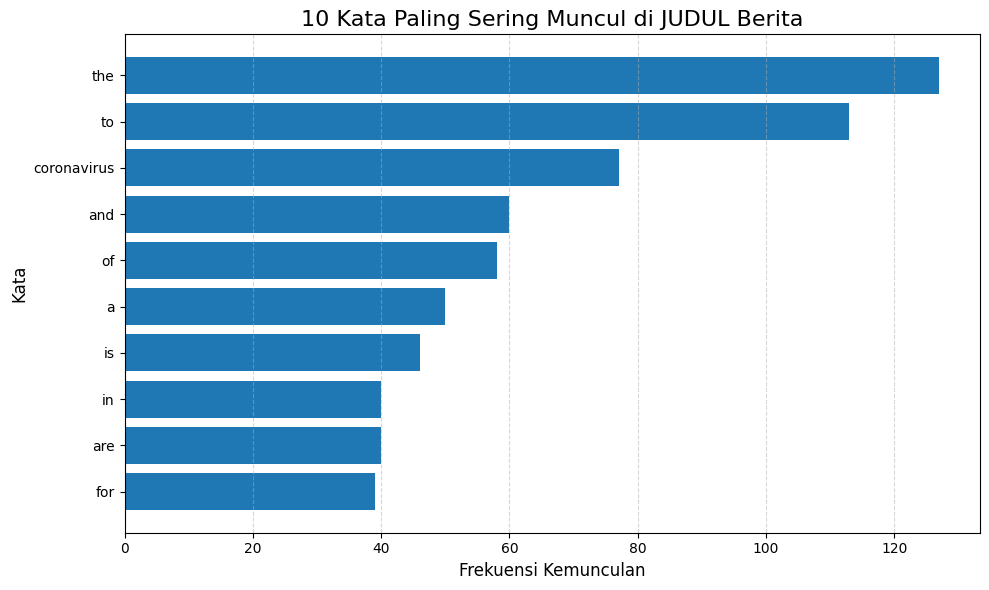

In [14]:
### a. barchart: Distribusi Kata Kunci di tittle
print("BAR CHART (10 Kata Kunci Teratas di Judul)")

if 'title' in df.columns:
    plt.figure(figsize=(10, 6))

    plt.barh(df_top_words['Kata'], df_top_words['Frekuensi'])
    plt.title('10 Kata Paling Sering Muncul di JUDUL Berita', fontsize=16)
    plt.xlabel('Frekuensi Kemunculan', fontsize=12)
    plt.ylabel('Kata', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    plt.gca().invert_yaxis()  # biar ranking 1 paling atas
    plt.tight_layout()
    plt.show()

else:
    print("Kolom 'title' tidak ditemukan. Bar Chart Frekuensi Kata tidak dapat dibuat.")

WORD CLOUD (Distribusi Kata di Body)


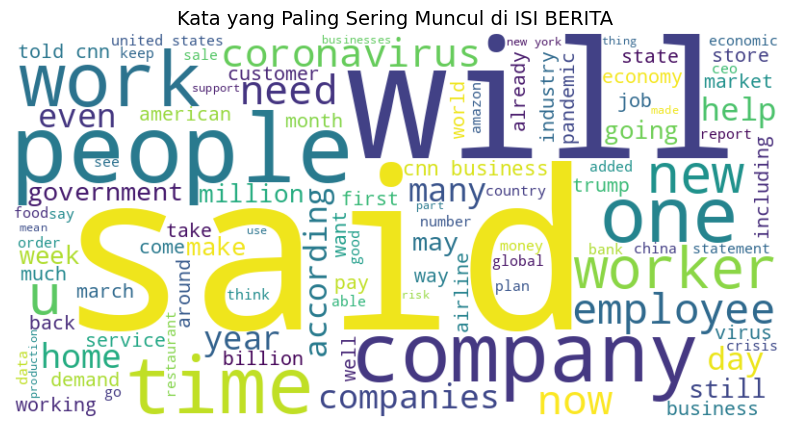

In [15]:
### b. WORD CLOUD: Distribusi Kata terbanyak di body
print("WORD CLOUD (Distribusi Kata di Body)")
if 'body' in df.columns:
    text_data_isi = " ".join(df['body'].astype(str).str.lower())

    wordcloud_isi = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=None,
        max_words=100
    ).generate(text_data_isi)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_isi, interpolation='bilinear')
    plt.axis("off")
    plt.title("Kata yang Paling Sering Muncul di ISI BERITA", fontsize=14)
    plt.show()

else:
    print("Kolom 'body' tidak ditemukan. Word Cloud tidak dapat dibuat.")

# Data Text Processing

In [16]:
df['text'] = df['title'].astype(str) + " " + df['body'].astype(str)

In [17]:
## tokenisasi

df['tokens'] = df['text'].astype(str).apply(nltk.word_tokenize)
df.head(20)

,title,body,Panjang_Isi,text,tokens
0,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",6337,Japan asked the international media to change ...,"[Japan, asked, the, international, media, to, ..."
1,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3906,The United States is still too reliant on oil ...,"[The, United, States, is, still, too, reliant,..."
2,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3212,Global stocks and US futures rise as policymak...,"[Global, stocks, and, US, futures, rise, as, p..."
3,China is trying to revive its economy without ...,The country where the pandemic began was almos...,9095,China is trying to revive its economy without ...,"[China, is, trying, to, revive, its, economy, ..."
4,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",7027,Companies that binged on buybacks now seek bai...,"[Companies, that, binged, on, buybacks, now, s..."
5,"Amazon hiring 100,000 new distribution workers...",The jobs will be Amazon's fulfillment centers ...,2288,"Amazon hiring 100,000 new distribution workers...","[Amazon, hiring, 100,000, new, distribution, w..."
6,These companies are hiring thousands of new em...,"Many retailers are shut down, but consumers co...",6898,These companies are hiring thousands of new em...,"[These, companies, are, hiring, thousands, of,..."
7,Cops in the toilet paper aisle: Grocery stores...,While stores are notoriously crowded during th...,2444,Cops in the toilet paper aisle: Grocery stores...,"[Cops, in, the, toilet, paper, aisle, :, Groce..."
8,AT&T CEO on coronavirus: This is 'a time of war',"""A lot of the business leaders, and myself, pa...",1977,AT&T CEO on coronavirus: This is 'a time of wa...,"[AT, &, T, CEO, on, coronavirus, :, This, is, ..."
9,Saudi Arabia just won control of the oil market,"But even more importantly, this new policy rec...",5160,Saudi Arabia just won control of the oil marke...,"[Saudi, Arabia, just, won, control, of, the, o..."


In [18]:
## 2. lematisasi
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word.lower()) for word in x])

df.head(20)

,title,body,Panjang_Isi,text,tokens,lemmatized
0,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",6337,Japan asked the international media to change ...,"[Japan, asked, the, international, media, to, ...","[japan, asked, the, international, medium, to,..."
1,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3906,The United States is still too reliant on oil ...,"[The, United, States, is, still, too, reliant,...","[the, united, state, is, still, too, reliant, ..."
2,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3212,Global stocks and US futures rise as policymak...,"[Global, stocks, and, US, futures, rise, as, p...","[global, stock, and, u, future, rise, a, polic..."
3,China is trying to revive its economy without ...,The country where the pandemic began was almos...,9095,China is trying to revive its economy without ...,"[China, is, trying, to, revive, its, economy, ...","[china, is, trying, to, revive, it, economy, w..."
4,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",7027,Companies that binged on buybacks now seek bai...,"[Companies, that, binged, on, buybacks, now, s...","[company, that, binged, on, buyback, now, seek..."
5,"Amazon hiring 100,000 new distribution workers...",The jobs will be Amazon's fulfillment centers ...,2288,"Amazon hiring 100,000 new distribution workers...","[Amazon, hiring, 100,000, new, distribution, w...","[amazon, hiring, 100,000, new, distribution, w..."
6,These companies are hiring thousands of new em...,"Many retailers are shut down, but consumers co...",6898,These companies are hiring thousands of new em...,"[These, companies, are, hiring, thousands, of,...","[these, company, are, hiring, thousand, of, ne..."
7,Cops in the toilet paper aisle: Grocery stores...,While stores are notoriously crowded during th...,2444,Cops in the toilet paper aisle: Grocery stores...,"[Cops, in, the, toilet, paper, aisle, :, Groce...","[cop, in, the, toilet, paper, aisle, :, grocer..."
8,AT&T CEO on coronavirus: This is 'a time of war',"""A lot of the business leaders, and myself, pa...",1977,AT&T CEO on coronavirus: This is 'a time of wa...,"[AT, &, T, CEO, on, coronavirus, :, This, is, ...","[at, &, t, ceo, on, coronavirus, :, this, is, ..."
9,Saudi Arabia just won control of the oil market,"But even more importantly, this new policy rec...",5160,Saudi Arabia just won control of the oil marke...,"[Saudi, Arabia, just, won, control, of, the, o...","[saudi, arabia, just, won, control, of, the, o..."


In [19]:
stemmer = PorterStemmer()
df['stemmed'] = df['lemmatized'].apply(lambda x: [stemmer.stem(word) for word in x])

df.head(20)

,title,body,Panjang_Isi,text,tokens,lemmatized,stemmed
0,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",6337,Japan asked the international media to change ...,"[Japan, asked, the, international, media, to, ...","[japan, asked, the, international, medium, to,...","[japan, ask, the, intern, medium, to, chang, h..."
1,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3906,The United States is still too reliant on oil ...,"[The, United, States, is, still, too, reliant,...","[the, united, state, is, still, too, reliant, ...","[the, unit, state, is, still, too, reliant, on..."
2,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3212,Global stocks and US futures rise as policymak...,"[Global, stocks, and, US, futures, rise, as, p...","[global, stock, and, u, future, rise, a, polic...","[global, stock, and, u, futur, rise, a, policy..."
3,China is trying to revive its economy without ...,The country where the pandemic began was almos...,9095,China is trying to revive its economy without ...,"[China, is, trying, to, revive, its, economy, ...","[china, is, trying, to, revive, it, economy, w...","[china, is, tri, to, reviv, it, economi, witho..."
4,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",7027,Companies that binged on buybacks now seek bai...,"[Companies, that, binged, on, buybacks, now, s...","[company, that, binged, on, buyback, now, seek...","[compani, that, bing, on, buyback, now, seek, ..."
5,"Amazon hiring 100,000 new distribution workers...",The jobs will be Amazon's fulfillment centers ...,2288,"Amazon hiring 100,000 new distribution workers...","[Amazon, hiring, 100,000, new, distribution, w...","[amazon, hiring, 100,000, new, distribution, w...","[amazon, hire, 100,000, new, distribut, worker..."
6,These companies are hiring thousands of new em...,"Many retailers are shut down, but consumers co...",6898,These companies are hiring thousands of new em...,"[These, companies, are, hiring, thousands, of,...","[these, company, are, hiring, thousand, of, ne...","[these, compani, are, hire, thousand, of, new,..."
7,Cops in the toilet paper aisle: Grocery stores...,While stores are notoriously crowded during th...,2444,Cops in the toilet paper aisle: Grocery stores...,"[Cops, in, the, toilet, paper, aisle, :, Groce...","[cop, in, the, toilet, paper, aisle, :, grocer...","[cop, in, the, toilet, paper, aisl, :, groceri..."
8,AT&T CEO on coronavirus: This is 'a time of war',"""A lot of the business leaders, and myself, pa...",1977,AT&T CEO on coronavirus: This is 'a time of wa...,"[AT, &, T, CEO, on, coronavirus, :, This, is, ...","[at, &, t, ceo, on, coronavirus, :, this, is, ...","[at, &, t, ceo, on, coronaviru, :, thi, is, ',..."
9,Saudi Arabia just won control of the oil market,"But even more importantly, this new policy rec...",5160,Saudi Arabia just won control of the oil marke...,"[Saudi, Arabia, just, won, control, of, the, o...","[saudi, arabia, just, won, control, of, the, o...","[saudi, arabia, just, won, control, of, the, o..."


In [20]:
## 4. Stopword

stop_words = set(stopwords.words('english'))
custom_stopwords = {"said", "mr", "ms", "would", "also", "year", "one", "two", "new"}
stop_words = stop_words.union(custom_stopwords)

def clean_tokens(tokens):
    cleaned = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]
    return [word for word in cleaned if word not in stop_words and len(word) > 2]

df['cleaned_tokens'] = df['stemmed'].apply(clean_tokens)

df.head(20)

,title,body,Panjang_Isi,text,tokens,lemmatized,stemmed,cleaned_tokens
0,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",6337,Japan asked the international media to change ...,"[Japan, asked, the, international, media, to, ...","[japan, asked, the, international, medium, to,...","[japan, ask, the, intern, medium, to, chang, h...","[japan, ask, intern, medium, chang, write, nam..."
1,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3906,The United States is still too reliant on oil ...,"[The, United, States, is, still, too, reliant,...","[the, united, state, is, still, too, reliant, ...","[the, unit, state, is, still, too, reliant, on...","[unit, state, still, reliant, oil, saudi, arab..."
2,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3212,Global stocks and US futures rise as policymak...,"[Global, stocks, and, US, futures, rise, as, p...","[global, stock, and, u, future, rise, a, polic...","[global, stock, and, u, futur, rise, a, policy...","[global, stock, futur, rise, policymak, tri, b..."
3,China is trying to revive its economy without ...,The country where the pandemic began was almos...,9095,China is trying to revive its economy without ...,"[China, is, trying, to, revive, its, economy, ...","[china, is, trying, to, revive, it, economy, w...","[china, is, tri, to, reviv, it, economi, witho...","[china, tri, reviv, economi, without, risk, li..."
4,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",7027,Companies that binged on buybacks now seek bai...,"[Companies, that, binged, on, buybacks, now, s...","[company, that, binged, on, buyback, now, seek...","[compani, that, bing, on, buyback, now, seek, ...","[compani, bing, buyback, seek, bailout, taxpay..."
5,"Amazon hiring 100,000 new distribution workers...",The jobs will be Amazon's fulfillment centers ...,2288,"Amazon hiring 100,000 new distribution workers...","[Amazon, hiring, 100,000, new, distribution, w...","[amazon, hiring, 100,000, new, distribution, w...","[amazon, hire, 100,000, new, distribut, worker...","[amazon, hire, distribut, worker, keep, onlin,..."
6,These companies are hiring thousands of new em...,"Many retailers are shut down, but consumers co...",6898,These companies are hiring thousands of new em...,"[These, companies, are, hiring, thousands, of,...","[these, company, are, hiring, thousand, of, ne...","[these, compani, are, hire, thousand, of, new,...","[compani, hire, thousand, employe, dure, coron..."
7,Cops in the toilet paper aisle: Grocery stores...,While stores are notoriously crowded during th...,2444,Cops in the toilet paper aisle: Grocery stores...,"[Cops, in, the, toilet, paper, aisle, :, Groce...","[cop, in, the, toilet, paper, aisle, :, grocer...","[cop, in, the, toilet, paper, aisl, :, groceri...","[cop, toilet, paper, aisl, groceri, store, add..."
8,AT&T CEO on coronavirus: This is 'a time of war',"""A lot of the business leaders, and myself, pa...",1977,AT&T CEO on coronavirus: This is 'a time of wa...,"[AT, &, T, CEO, on, coronavirus, :, This, is, ...","[at, &, t, ceo, on, coronavirus, :, this, is, ...","[at, &, t, ceo, on, coronaviru, :, thi, is, ',...","[ceo, coronaviru, thi, time, war, lot, busi, l..."
9,Saudi Arabia just won control of the oil market,"But even more importantly, this new policy rec...",5160,Saudi Arabia just won control of the oil marke...,"[Saudi, Arabia, just, won, control, of, the, o...","[saudi, arabia, just, won, control, of, the, o...","[saudi, arabia, just, won, control, of, the, o...","[saudi, arabia, control, oil, market, even, im..."


In [21]:
df['clean_text'] = df['cleaned_tokens'].apply(lambda x: " ".join(x))

df[['text', 'clean_text']].head(20)

,text,clean_text
0,Japan asked the international media to change ...,japan ask intern medium chang write name liste...
1,The United States is still too reliant on oil ...,unit state still reliant oil saudi arabia deci...
2,Global stocks and US futures rise as policymak...,global stock futur rise policymak tri blunt co...
3,China is trying to revive its economy without ...,china tri reviv economi without risk life worl...
4,Companies that binged on buybacks now seek bai...,compani bing buyback seek bailout taxpay compa...
5,"Amazon hiring 100,000 new distribution workers...",amazon hire distribut worker keep onlin shop s...
6,These companies are hiring thousands of new em...,compani hire thousand employe dure coronaviru ...
7,Cops in the toilet paper aisle: Grocery stores...,cop toilet paper aisl groceri store add extra ...
8,AT&T CEO on coronavirus: This is 'a time of wa...,ceo coronaviru thi time war lot busi leader pa...
9,Saudi Arabia just won control of the oil marke...,saudi arabia control oil market even important...


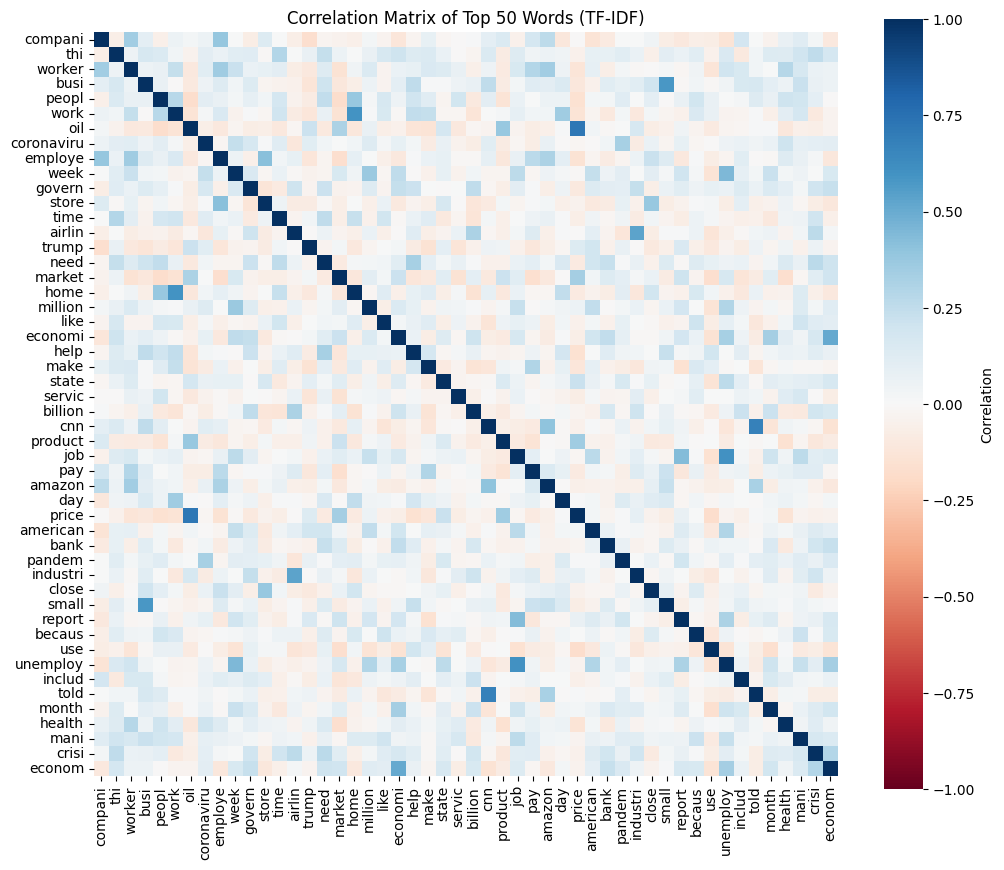

In [31]:
## Matrik korelasi

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)
top_n = 50
top_words = tfidf_df.mean().sort_values(ascending=False).head(top_n).index
tfidf_top = tfidf_df[top_words]
correlation_matrix = tfidf_top.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={'label': 'Correlation'}
)
plt.title(f"Correlation Matrix of Top {top_n} Words (TF-IDF)")
plt.show()


In [32]:
## Teks vektorisasi

### TF-IDF Vectorizer
print("Menjalankan TF-IDF Vectorizer...")
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['clean_text'])
low_idf_tokens = [
    word for word, idf in zip(vectorizer.get_feature_names_out(), vectorizer.idf_)
    if idf < 1.5
]
print(f"Jumlah token dengan IDF < 1.5: {len(low_idf_tokens)}")
print(f"Contoh token umum: {low_idf_tokens[:10]}")


### Count Vectorizer
print("\nMenjalankan Count Vectorizer...")
count_vectorizer = CountVectorizer(stop_words='english')
X_count = count_vectorizer.fit_transform(df['clean_text'])
count_df = pd.DataFrame(
    X_count.toarray(),
    columns=count_vectorizer.get_feature_names_out()
)
print("Vektorisasi teks selesai.")
print(f"Jumlah fitur (CountVectorizer): {X_count.shape[1]}")
print(count_df.head())


Menjalankan TF-IDF Vectorizer...
Jumlah token dengan IDF < 1.5: 10
Contoh token umum: ['busi', 'compani', 'coronaviru', 'like', 'need', 'peopl', 'thi', 'time', 'week', 'work']

Menjalankan Count Vectorizer...
Vektorisasi teks selesai.
Jumlah fitur (CountVectorizer): 9065
   aaa  aal  aapl  aaron  aback  abandon  abarrel  abat  abbott  abbv  ...  \
0    0    0     0      0      0        0        0     0       0     0  ...   
1    0    0     0      0      0        0        0     0       0     0  ...   
2    0    0     0      0      0        0        0     0       0     0  ...   
3    0    0     0      0      0        0        0     0       0     0  ...   
4    0    1     0      0      0        0        0     0       0     0  ...   

   zippi  zomato  zombi  zona  zone  zoom  zoombomb  zucker  zuckerberg  \
0      0       0      0     0     0     0         0       0           0   
1      0       0      0     0     0     0         0       0           0   
2      0       0      0     0     

# Data Modeling

## DATA MODELING: LDA TOPIC MODELING
Model yang digunakan: Latent Dirichlet Allocation (LDA)

LDA adalah metode unsupervised learning yang bertujuan mengelompokkan dokumen ke dalam beberapa topik berdasarkan distribusi kata.
Setiap dokumen dianggap sebagai campuran beberapa topik, dan setiap topik adalah kumpulan kata yang sering muncul bersama.
LDA dipilih karena metode ini cocok untuk menemukan tema utama dalam teks panjang seperti gabungan title dan body. Model ini mudah dipahami karena setiap topik ditampilkan sebagai kumpulan kata-kata yang paling sering muncul. LDA juga umum digunakan dalam NLP untuk mengeksplorasi dan memahami isi dataset teks yang belum memiliki label.

In [33]:
n_topics = 6
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X_count)

LatentDirichletAllocation(n_components=5, random_state=42)

In [55]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopik {topic_idx}:")
        top_features_indices = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_indices]
        print("Kata dominan:", ", ".join(top_features))

feature_names = count_vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words=5)


Topik 0:
Kata dominan: trump, thi, store, coronaviru, peopl

Topik 1:
Kata dominan: compani, thi, peopl, use, app

Topik 2:
Kata dominan: thi, oil, compani, busi, market

Topik 3:
Kata dominan: compani, worker, work, thi, peopl

Topik 4:
Kata dominan: peopl, work, game, home, thi


# Visualisasi Topic yang dimunculkan menggunakan tabel, barchart dan sebagainya


WordCloud Topik 0


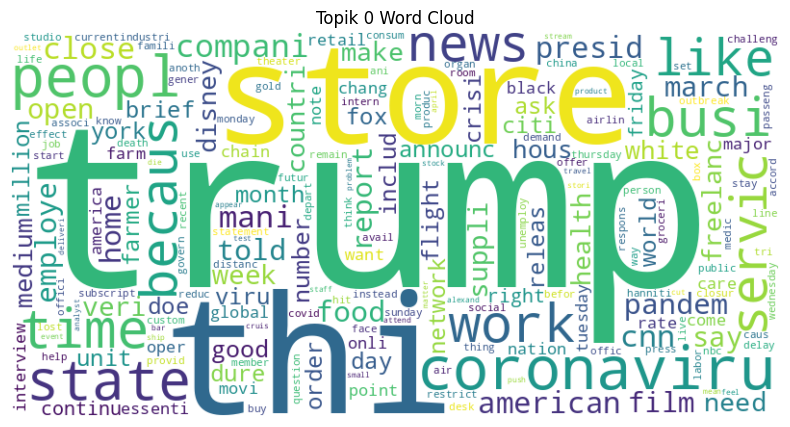


WordCloud Topik 1


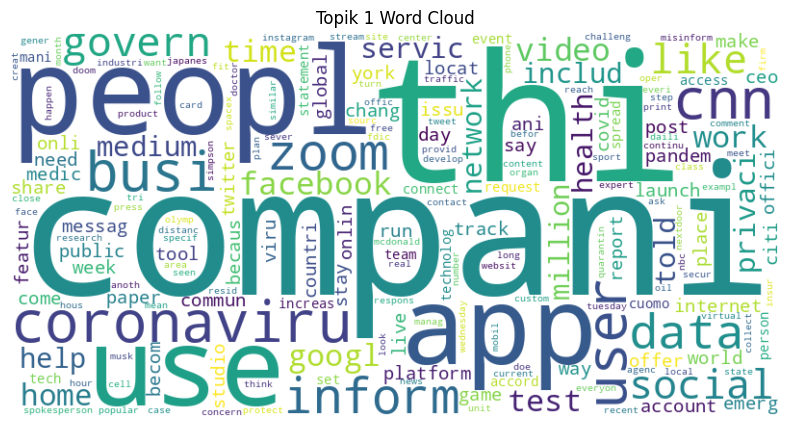


WordCloud Topik 2


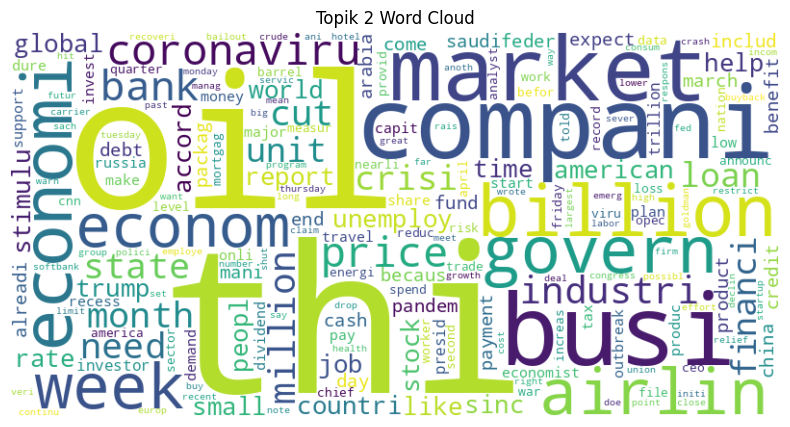


WordCloud Topik 3


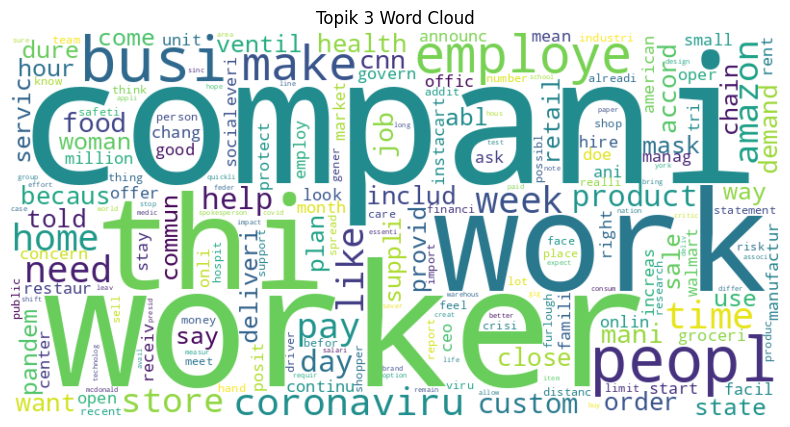


WordCloud Topik 4


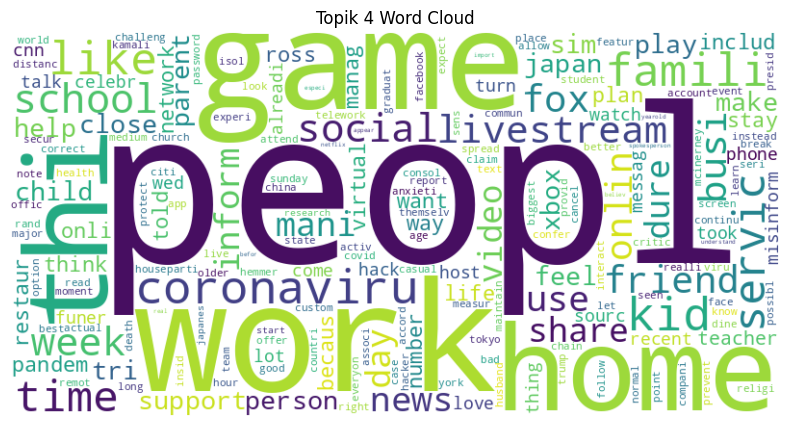

In [56]:
### WORDCLOUD PERTOPIK

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nWordCloud Topik {topic_idx}")
    word_freq = {feature_names[i]: topic[i] for i in range(len(feature_names))}
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topik {topic_idx} Word Cloud")
    plt.show()

In [57]:
### Tabel Kata Dominan per Topik

top_words = 5
topics_data = []

for topic_idx, topic in enumerate(lda_model.components_):
    top_features_indices = topic.argsort()[:-top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_indices]
    top_weights = topic[top_features_indices]
    for word, weight in zip(top_features, top_weights):
        topics_data.append({'Topic': f'Topic_{topic_idx}', 'Word': word, 'Weight': weight})

topics_df = pd.DataFrame(topics_data)
print("Tabel Kata Dominan per Topik:")
display(topics_df)

Tabel Kata Dominan per Topik:


,Topic,Word,Weight
0,Topic_0,trump,174.633514
1,Topic_0,thi,162.683377
2,Topic_0,store,118.280103
3,Topic_0,coronaviru,106.077011
4,Topic_0,peopl,97.252059
5,Topic_1,compani,117.729291
6,Topic_1,thi,114.155150
7,Topic_1,peopl,113.947302
8,Topic_1,use,92.961368
9,Topic_1,app,92.183851


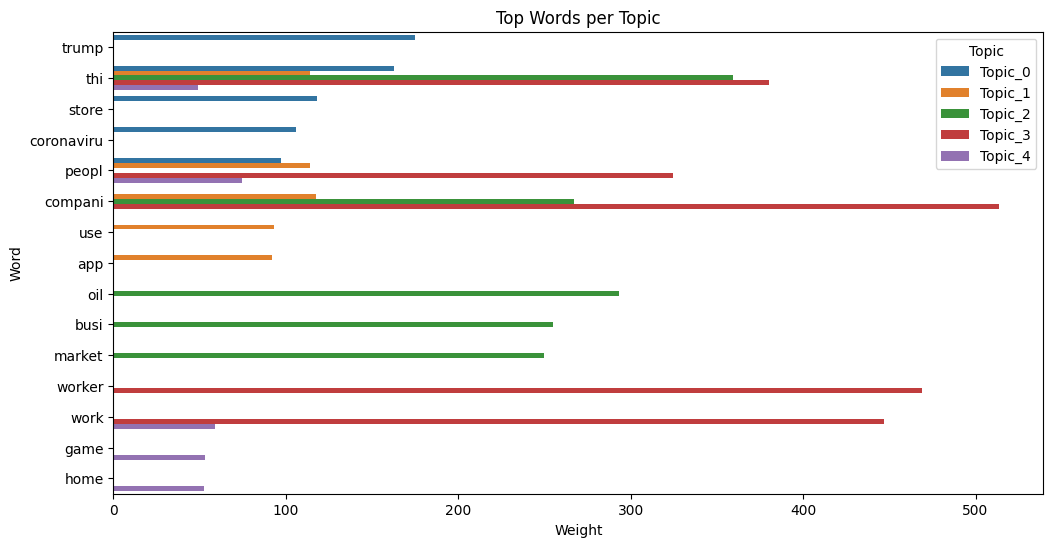

In [58]:
### Bar Chart Kata Dominan per Topik

plt.figure(figsize=(12,6))
sns.barplot(x='Weight', y='Word', hue='Topic', data=topics_df)
plt.title('Top Words per Topic')
plt.xlabel('Weight')
plt.ylabel('Word')
plt.legend(title='Topic')
plt.show()

/tmp/ipython-input-3388282631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Word', data=df_plot, palette='viridis')


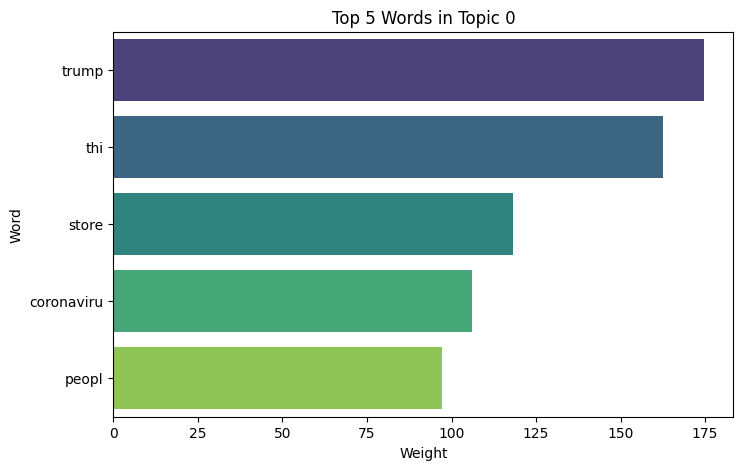

/tmp/ipython-input-3388282631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Word', data=df_plot, palette='viridis')


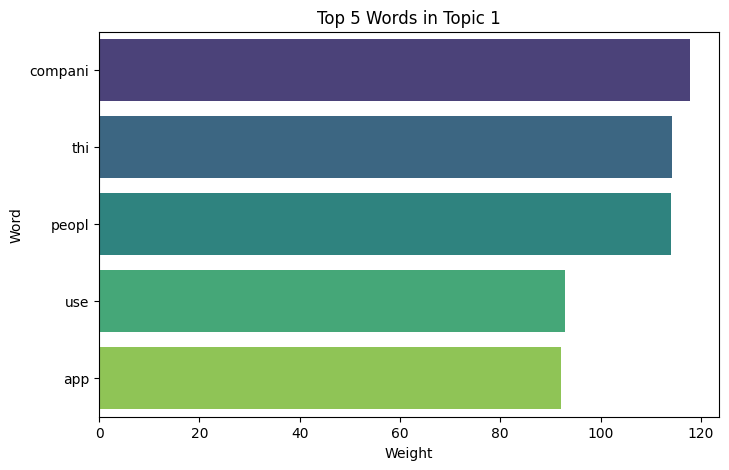

/tmp/ipython-input-3388282631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Word', data=df_plot, palette='viridis')


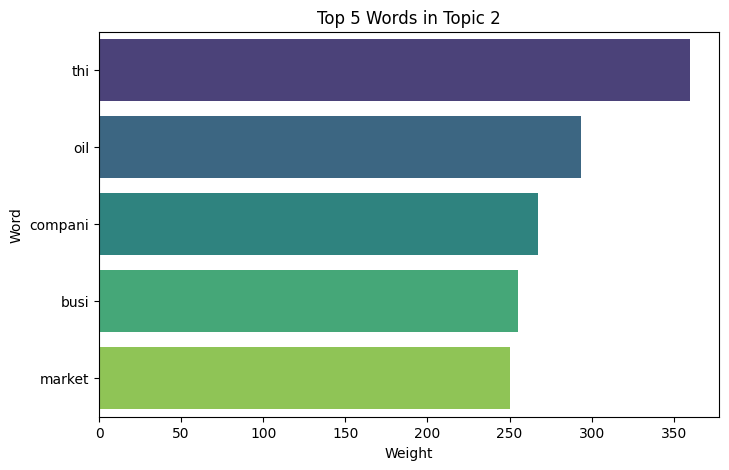

/tmp/ipython-input-3388282631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Word', data=df_plot, palette='viridis')


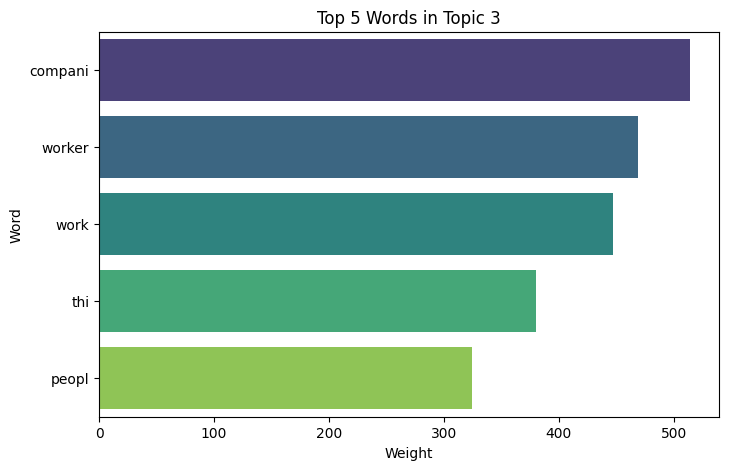

/tmp/ipython-input-3388282631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Word', data=df_plot, palette='viridis')


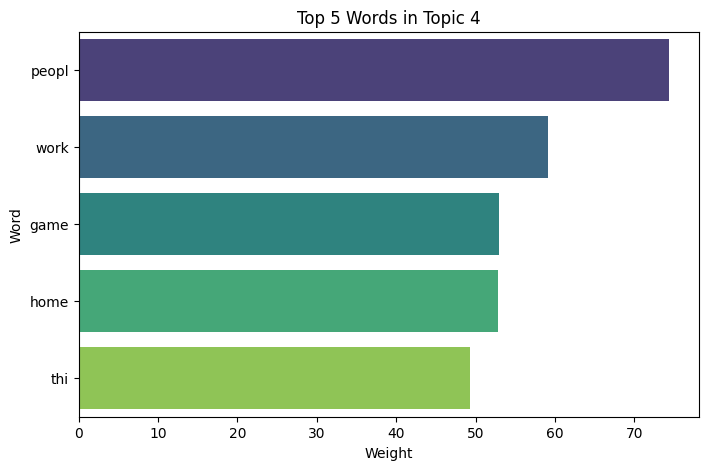

In [59]:
### Bar Chart per Topik
n_topics = lda_model.n_components
for t in range(n_topics):
    plt.figure(figsize=(8,5))
    df_plot = topics_df[topics_df['Topic'] == f'Topic_{t}']
    sns.barplot(x='Weight', y='Word', data=df_plot, palette='viridis')
    plt.title(f'Top {top_words} Words in Topic {t}')
    plt.xlabel('Weight')
    plt.ylabel('Word')
    plt.show()

# Gunakan implementasi menggunakan PCA atau T-sne untuk tahap lanjutan

In [60]:
doc_topics = lda_model.transform(X_count)
dominant_topic = np.argmax(doc_topics, axis=1)

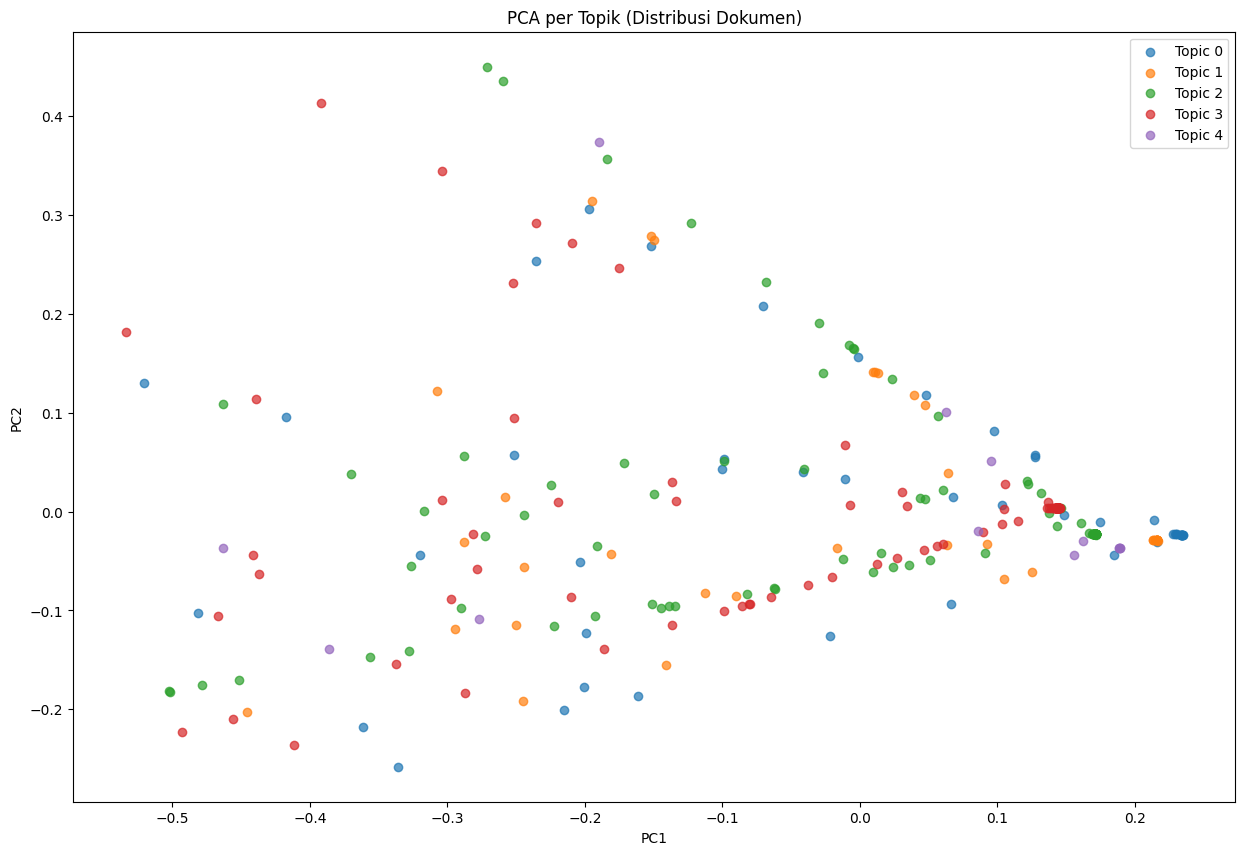

In [61]:
### a. pca

dominant_topic = doc_topics.argmax(axis=1)
n_topics = doc_topics.shape[1]
pca = PCA(n_components=2)

plt.figure(figsize=(15, 10))
for topic_idx in range(n_topics):
    topic_docs = doc_topics[dominant_topic == topic_idx]
    if topic_docs.shape[0] < 2:
        continue
    pca_result = pca.fit_transform(topic_docs)
    plt.scatter(
        pca_result[:, 0],
        pca_result[:, 1],
        label=f"Topic {topic_idx}",
        alpha=0.7
    )
plt.title("PCA per Topik (Distribusi Dokumen)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


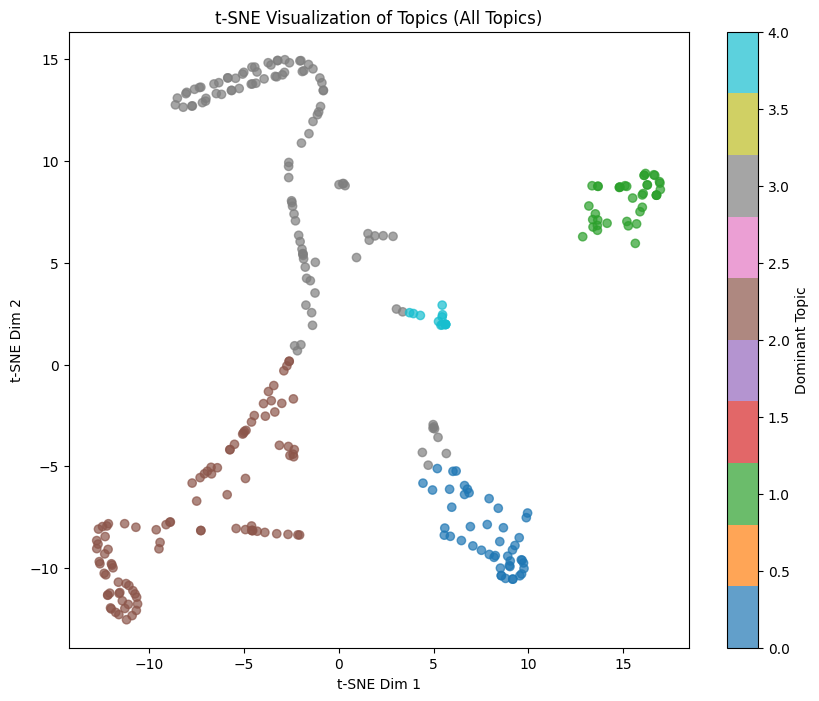

In [62]:
### b. t-sne

dominant_topic = doc_topics.argmax(axis=1)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(doc_topics)

plt.figure(figsize=(10,8))
scatter = plt.scatter(
    tsne_result[:,0], tsne_result[:,1],
    c=dominant_topic,
    cmap='tab10',
    alpha=0.7
)
plt.colorbar(scatter, label='Dominant Topic')
plt.title("t-SNE Visualization of Topics (All Topics)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()


Running t-SNE for Topic 0 (n=47, perplexity=23)


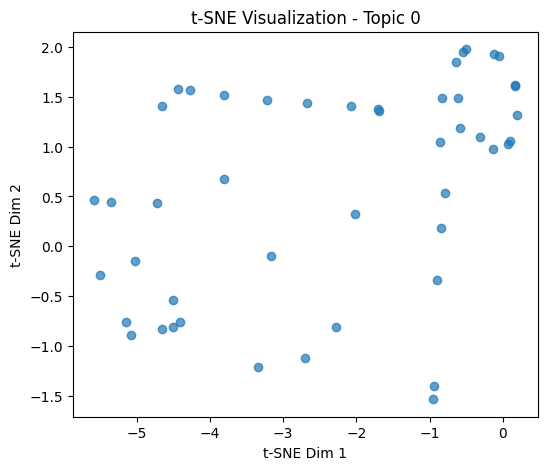

Running t-SNE for Topic 1 (n=39, perplexity=19)


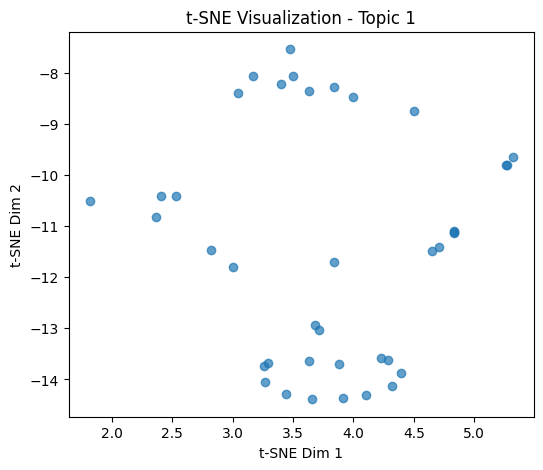

Running t-SNE for Topic 2 (n=98, perplexity=30)


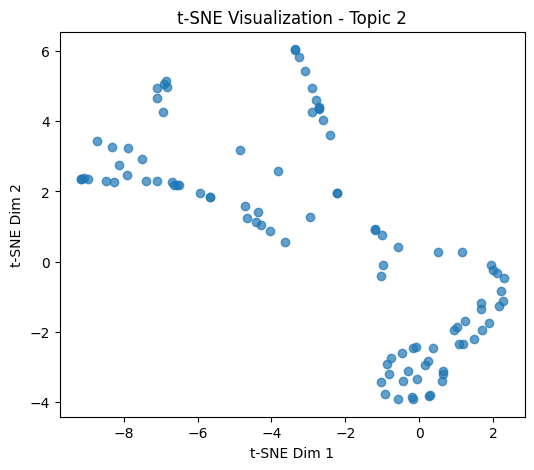

Running t-SNE for Topic 3 (n=104, perplexity=30)


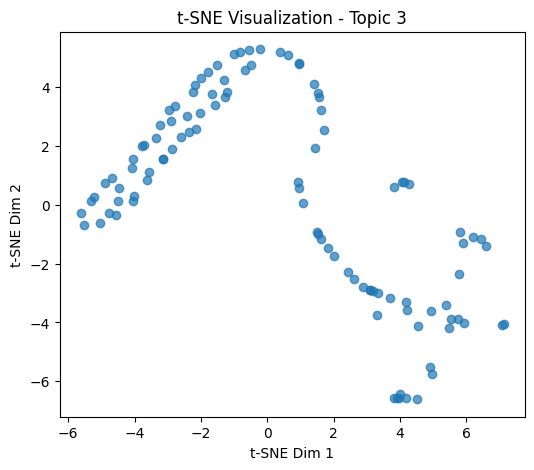

Running t-SNE for Topic 4 (n=13, perplexity=6)


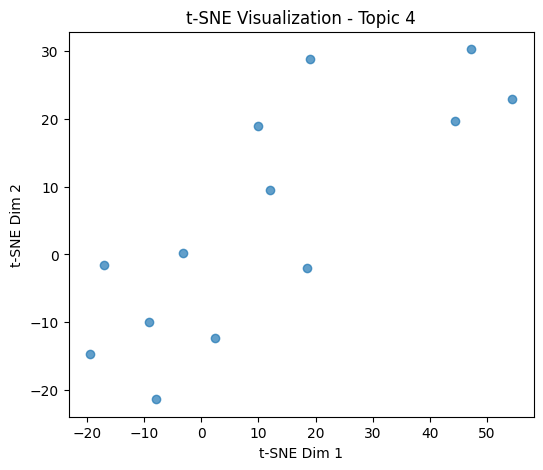

In [54]:
### b. t-sne2
dominant_topic = doc_topics.argmax(axis=1)
n_topics = doc_topics.shape[1]

for topic_idx in range(n_topics):
    topic_docs = doc_topics[dominant_topic == topic_idx]
    n_samples = topic_docs.shape[0]
    if n_samples < 3:
        print(f"Skip Topic {topic_idx}: hanya {n_samples} dokumen.")
        continue
    perplexity = min(30, max(5, n_samples // 2))

    print(f"Running t-SNE for Topic {topic_idx} (n={n_samples}, perplexity={perplexity})")

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_result = tsne.fit_transform(topic_docs)
    plt.figure(figsize=(6,5))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color='tab:blue', alpha=0.7)
    plt.title(f"t-SNE Visualization - Topic {topic_idx}")
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.show()
